In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import openpyxl as pxl
plt.rcParams['figure.figsize'] = [12,8]
plt.style.use('fivethirtyeight')

In [3]:
wb = pxl.load_workbook("./Master Alignment.xlsx")
ws = wb.active

f = lambda i: (ws.cell(row=i*5-2, column=9).value*1000,
               ws.cell(row=i*5-3, column=9).value*1000,
               ws.cell(row=i*5, column=10).value)
xs, ys, ts = zip(*[f(i) for i in range(1,ws.max_row//5+1)])

<IPython.core.display.Javascript object>


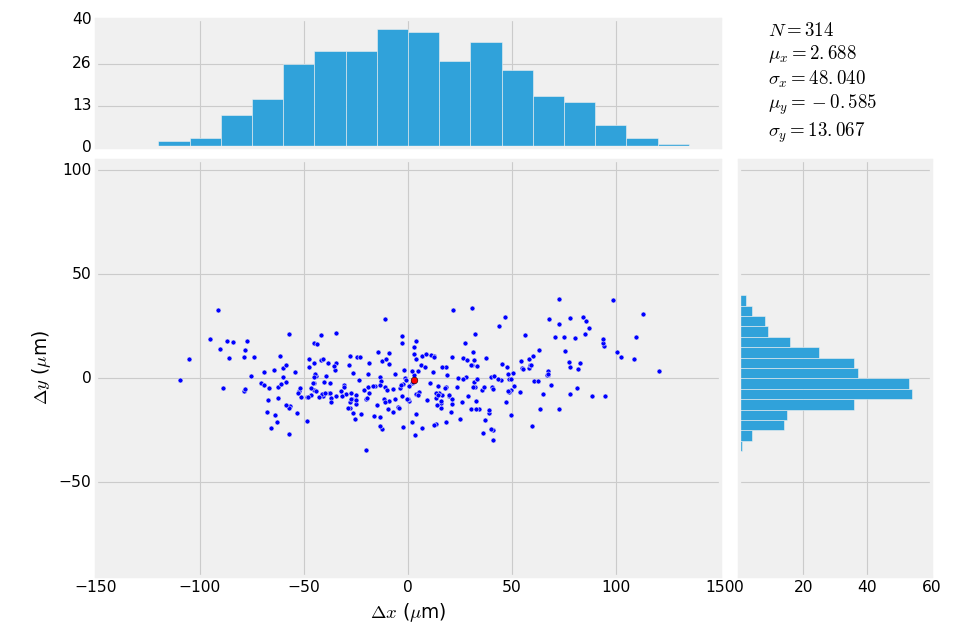

In [4]:
from scatter_hist import scatter_hist

fig = plt.figure()

scatter_hist(xs,ys,fig, nbins=20, plot_mean=True, xlabel="$\\Delta x$ ($\mu$m)", ylabel="$\\Delta y$ ($\mu$m)")

<IPython.core.display.Javascript object>


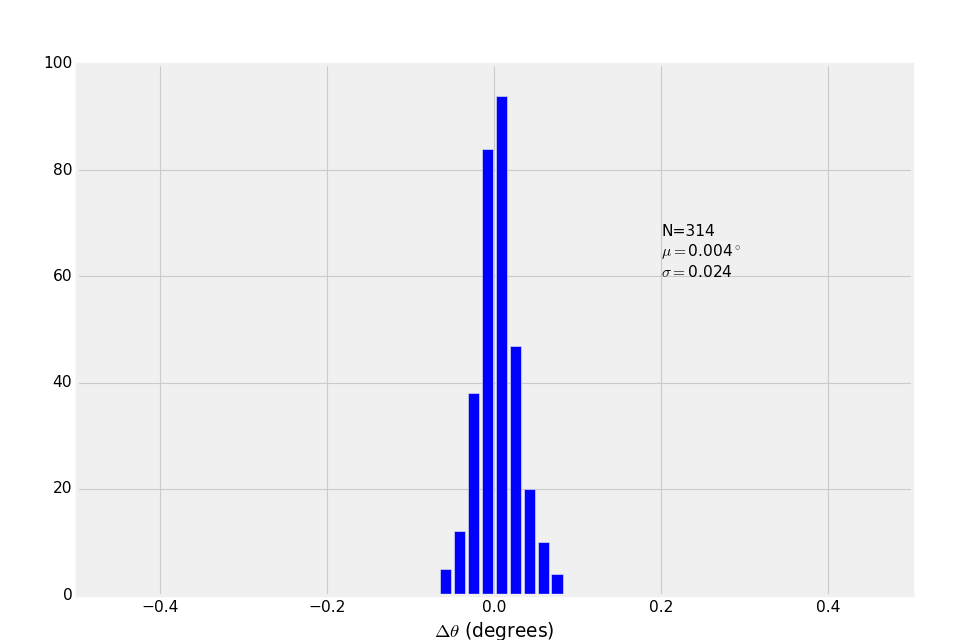

In [5]:
fig = plt.figure()
ax = fig.gca()

hist, bins = np.histogram(ts, bins=60, range=(-.5,.5))
width = 0.8 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
ax.bar(center, hist, align='center', width=width)
ax.set_xlim((-.5,.5))
#ax.set_ylim((0,25))
label = "N={:d}\n$\mu=${:0.3f}$^\circ$\n$\sigma=${:0.3f}".format(len(ts), np.mean(ts), np.std(ts))
ax.text(0.2, 60, label)
ax.set_xlabel("$\\Delta\\theta$ (degrees)")